In [25]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from protein_dataset import ProteinDataset
import constants as CONSTANTS
from models.basic_vae_1 import BasicVAE1
from models.vae_loss import VAELoss


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
pd = ProteinDataset(CONSTANTS.train_file)
print(pd.__len__())
x, y = pd.__getitem__(0)
print(x.shape, y.shape)

1a1g: 1-hot size: torch.Size([84, 20]) contact-map size: torch.Size([84, 84])
3ndo: 1-hot size: torch.Size([450, 20]) contact-map size: torch.Size([450, 450])
3ndq: 1-hot size: torch.Size([97, 20]) contact-map size: torch.Size([97, 97])
209
torch.Size([1, 20, 64]) torch.Size([32, 32])


In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BasicVAE1()
model.to(device)
criterion = VAELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
batch_size = 20
n_epochs = 5
print_every = 2
test_every =

In [28]:
train_loader = DataLoader(pd, batch_size=batch_size, shuffle=True)
len(train_loader)

11

In [29]:
def train():
    model.train()
    loss = 0.0
    losses = []
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        #         print(x.shape, y.shape)
        optimizer.zero_grad()
        y_prime, mu, logvar = model(x)
        print(y_prime.shape)
        #         y_prime.squeeze_(0)
        loss = criterion(y, y_prime, mu, logvar)
        print(loss)
        loss.backward()
        optimizer.step()
        losses.append(loss)
        return torch.stack(losses).mean().item()
        

In [30]:
train()

torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(17433.9180, device='cuda:0', grad_fn=<AddBackward0>)


17433.91796875

torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(20224.2363, device='cuda:0', grad_fn=<AddBackward0>)


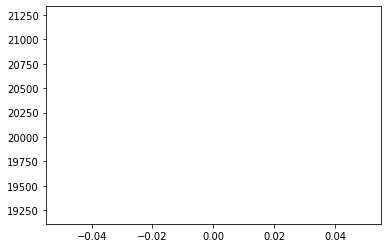

torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(11859.9150, device='cuda:0', grad_fn=<AddBackward0>)
torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(9303.3135, device='cuda:0', grad_fn=<AddBackward0>)


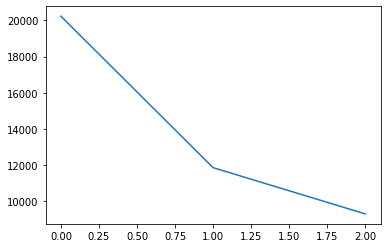

torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(7797.4204, device='cuda:0', grad_fn=<AddBackward0>)
torch.Size([20, 1, 32, 32])
torch.Size([20, 1, 32, 32]) torch.Size([20, 32, 32])
tensor(10158.4834, device='cuda:0', grad_fn=<AddBackward0>)


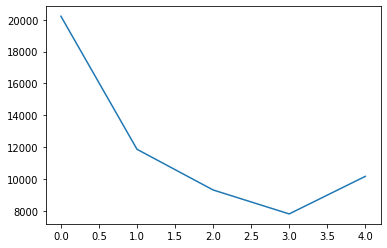

In [32]:
train_losses = []
for epoch in range(1, n_epochs+1):
    train_loss = train()
    train_losses.append(train_loss)
    if epoch % print_every:
        plt.plot(train_losses)
        plt.show()
    